In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

         ID_CIDERH REGION   FECHA_RBE  TEMP_MEDIA_RBE    LAT_Y    LON_X
0       M_001_B_II     II  1994-06-01             8.6 -22.4953 -69.9044
1       M_001_B_II     II  1994-06-02             9.5 -22.4953 -69.9044
2       M_001_B_II     II  1994-06-03            12.6 -22.4953 -69.9044
3       M_001_B_II     II  1994-06-04            10.7 -22.4953 -69.9044
4       M_001_B_II     II  1994-06-05            10.6 -22.4953 -69.9044
...            ...    ...         ...             ...      ...      ...
146671    M_232_AA     II  1985-04-24            21.0 -22.5000 -68.9170
146672    M_232_AA     II  1986-04-16             3.0 -22.5000 -68.9170
146673    M_232_AA     II  1986-09-20            22.0 -22.5000 -68.9170
146674    M_232_AA     II  1986-11-23            21.0 -22.5000 -68.9170
146675    M_232_AA     II  1987-10-18             8.0 -22.5000 -68.9170

[146676 rows x 6 columns]


ID_CIDERH   M_022_A_II  M_023_A_II  M_024_A_II  M_027_A_II
ID_CIDERH                                                 
M_022_A_II    1.000000    0.697155    0.625462    0.707293
M_023_A_II    0.697155    1.000000    0.696090    0.689432
M_024_A_II    0.625462    0.696090    1.000000    0.560623
M_027_A_II    0.707293    0.689432    0.560623    1.000000


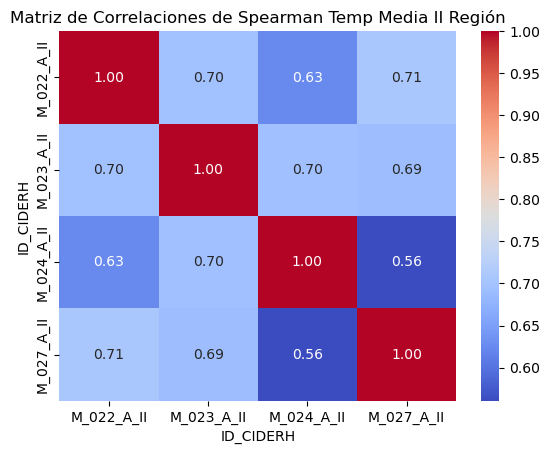

Cantidad de datos de TEMP_MEDIA_RBE por estación:
ID_CIDERH
M_022_A_II    7337
M_023_A_II    5695
M_024_A_II    6490
M_027_A_II    7279
Name: TEMP_MEDIA_RBE, dtype: int64


In [3]:
# Lista de estaciones específicas
estaciones_especificas = ['M_022_A_II', 'M_023_A_II', 'M_024_A_II', 'M_027_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MEDIA_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman Temp Media II Región')
plt.show()

# Contar la cantidad de datos de TEMP_MEDIA_RBE para cada estación seleccionada
cantidad_datos_temp_min_por_estacion = datos_especificos.groupby('ID_CIDERH')['TEMP_MEDIA_RBE'].count()

# Mostrar la cantidad de datos para cada estación
print("Cantidad de datos de TEMP_MEDIA_RBE por estación:")
print(cantidad_datos_temp_min_por_estacion)